<a href="https://colab.research.google.com/github/faseenafarz/machine-learning/blob/main/cyber_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#  importing numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/cybersecurity_attacks.csv')
df.head()


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [26]:
df.shape

(40000, 25)

In [27]:
df.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

In [28]:
#checking the null values
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Dropping the unwanted columns

In [29]:
#df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source','Alerts/Warnings','Malware Indicators'], axis=1, inplace=True)

In [30]:
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [31]:
df.shape

(40000, 25)

In [32]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [33]:
columns_to_drop=['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
df=df.drop(columns_to_drop, axis=1)

In [34]:
df.dtypes

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

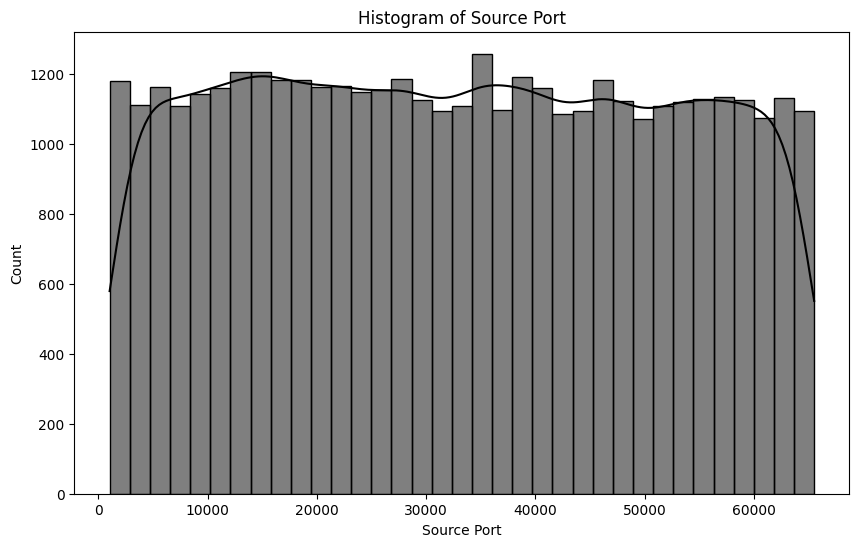

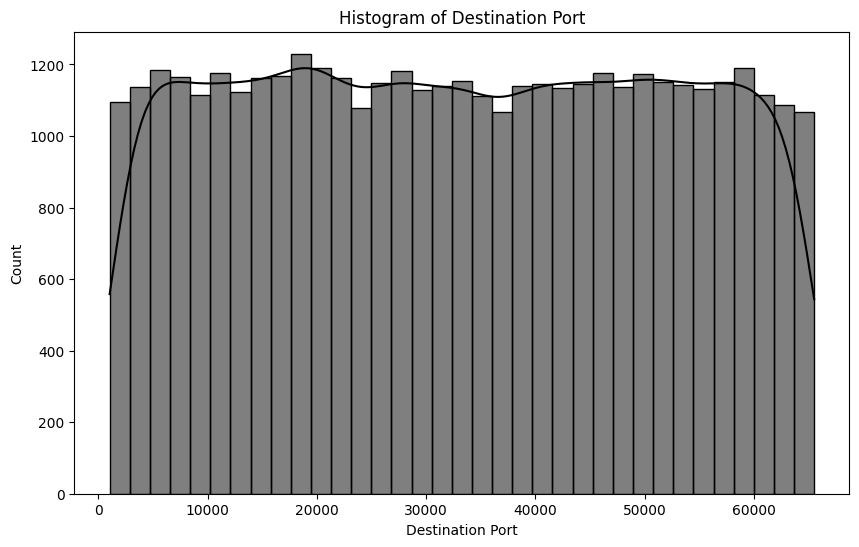

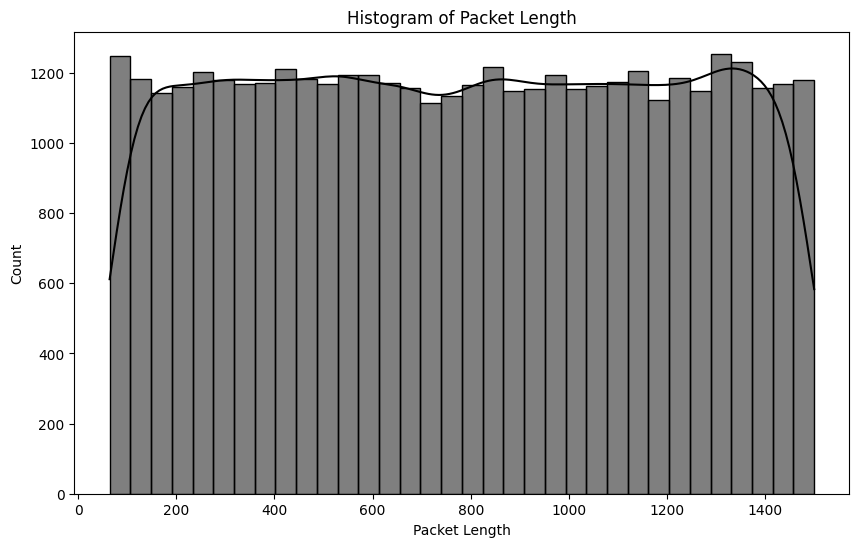

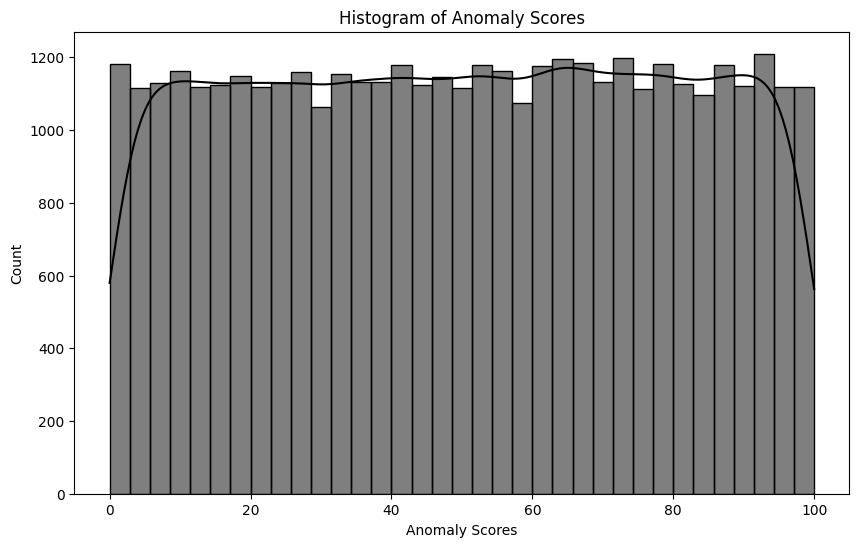

In [35]:
# Histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True,color = 'black')
    plt.title(f'Histogram of {col}')
    plt.show()

In [36]:
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [37]:
# #pie chart for categorical columns
# categoricalcolumns=df(['Packet Type','Traffic Type','Payload Data' ,'Malware Indicators','Alerts/Warnings','Attack Type','Attack Signature','Action Taken','Severity Level','Network Segment'],axis=1)
# for feature in categoricalcolumns:
#     counts = df[feature].value_counts()
#     plt.figure(figsize=(10, 6))
#     plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
#     # Equal aspect ratio ensures that pie is drawn as a circle.
#     plt.axis('equal')
#     plt.title(f'Pie Chart for {feature}')
#     plt.show()

<ipython-input-38-c60fc01c2fbc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_counts.index, y=attack_counts,palette='cubehelix')


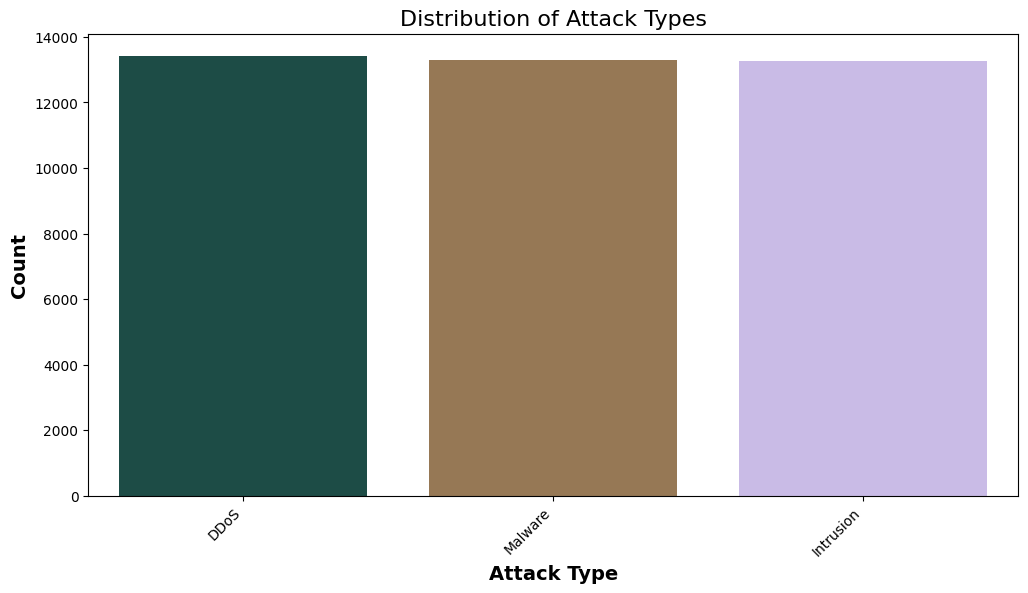

In [38]:
attack_counts = df['Attack Type'].value_counts()
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_counts.index, y=attack_counts,palette='cubehelix')

# Adding labels and title
plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Types', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

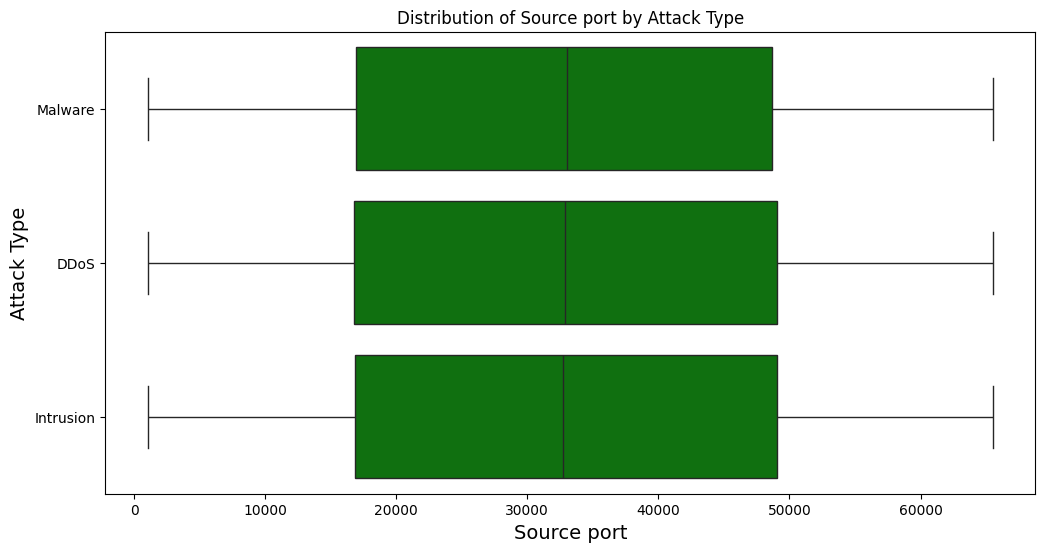

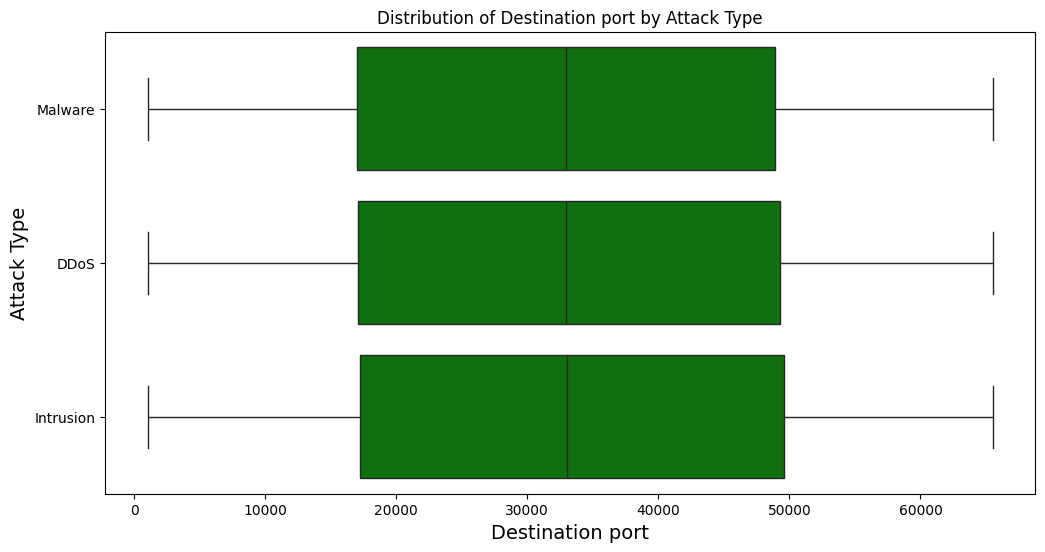

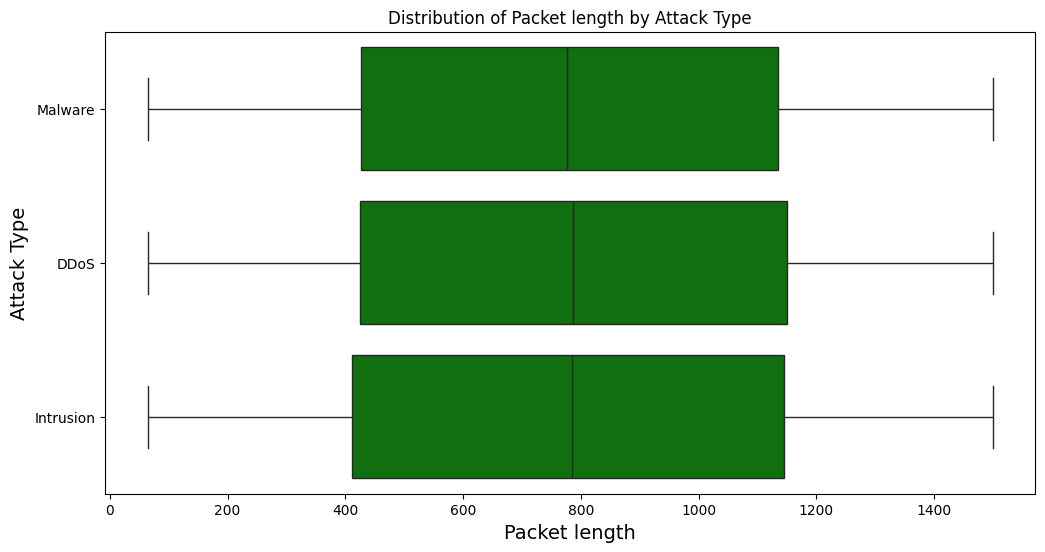

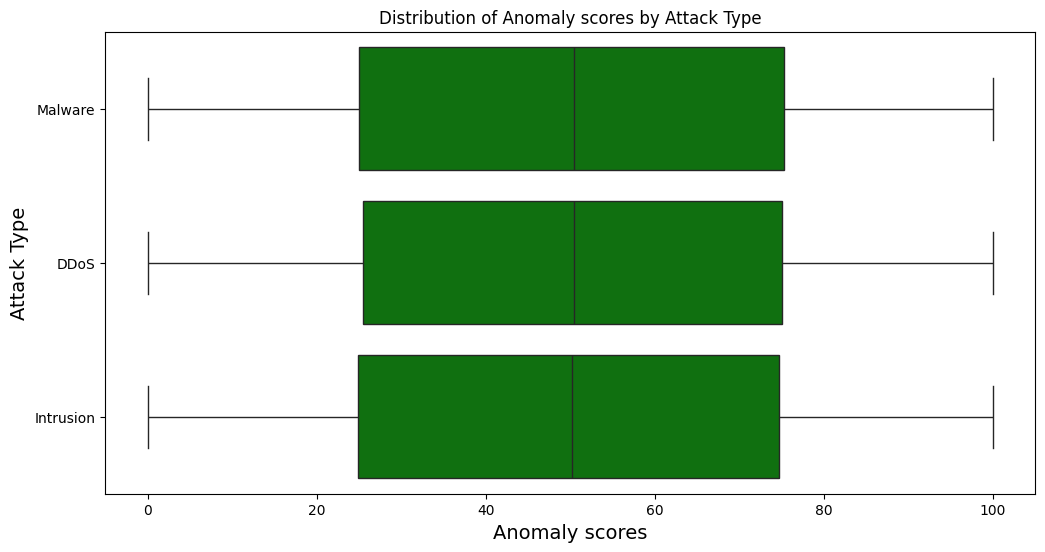

In [39]:
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df,x=col, y='Attack Type',color='g')
    plt.title(f'Distribution of {col.capitalize()} by Attack Type')
    plt.xlabel(col.capitalize(), fontsize=14)
    plt.ylabel('Attack Type', fontsize=14)
    plt.show()

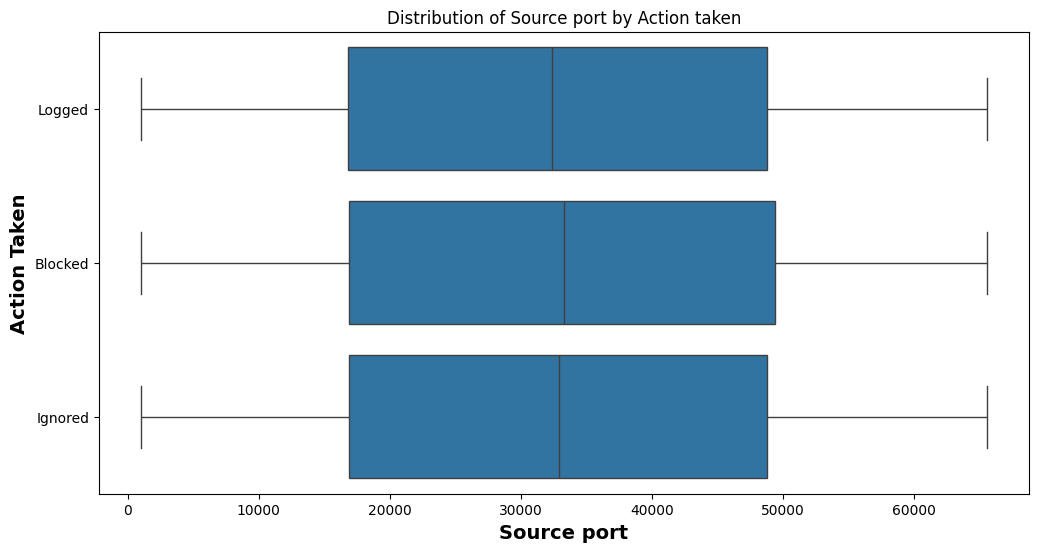

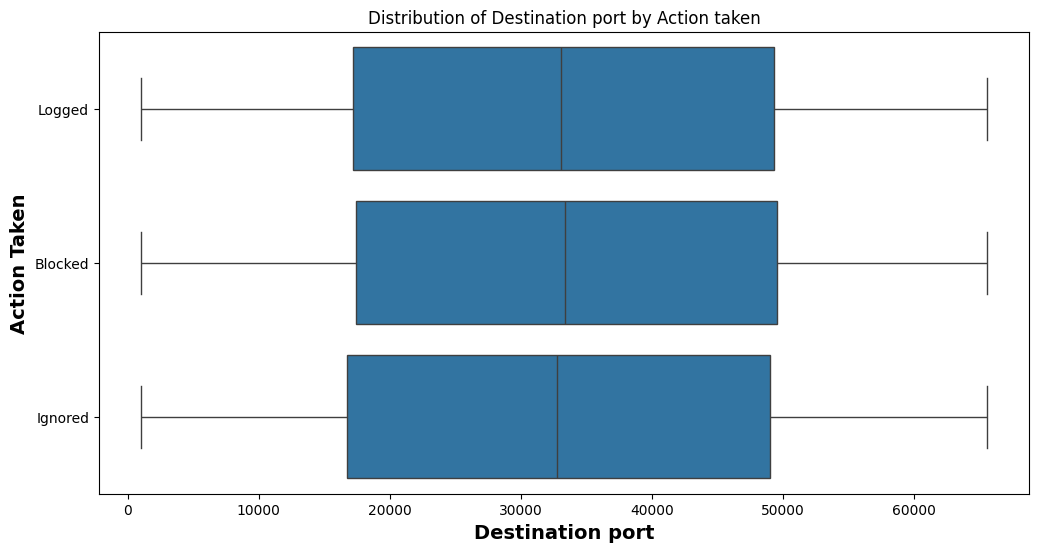

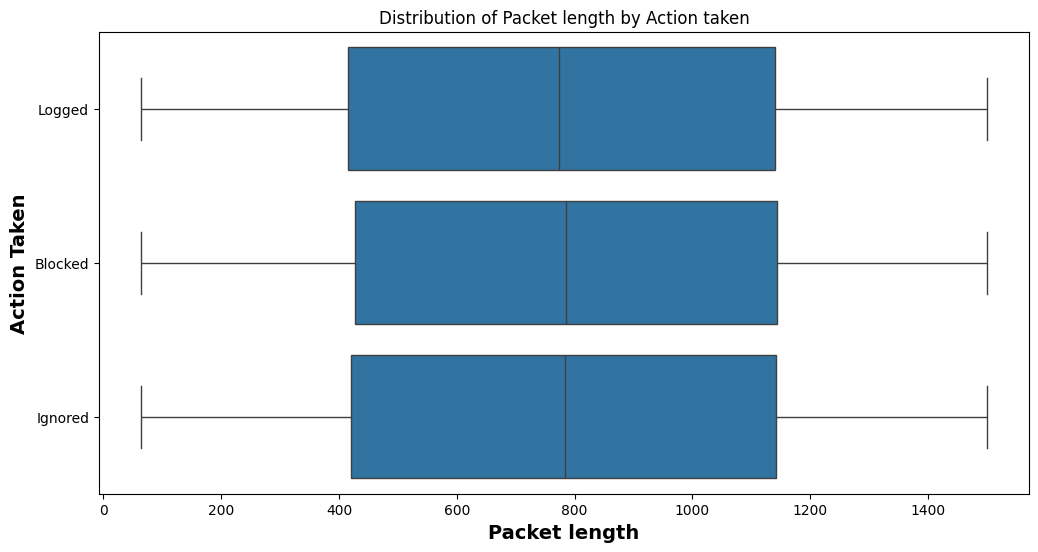

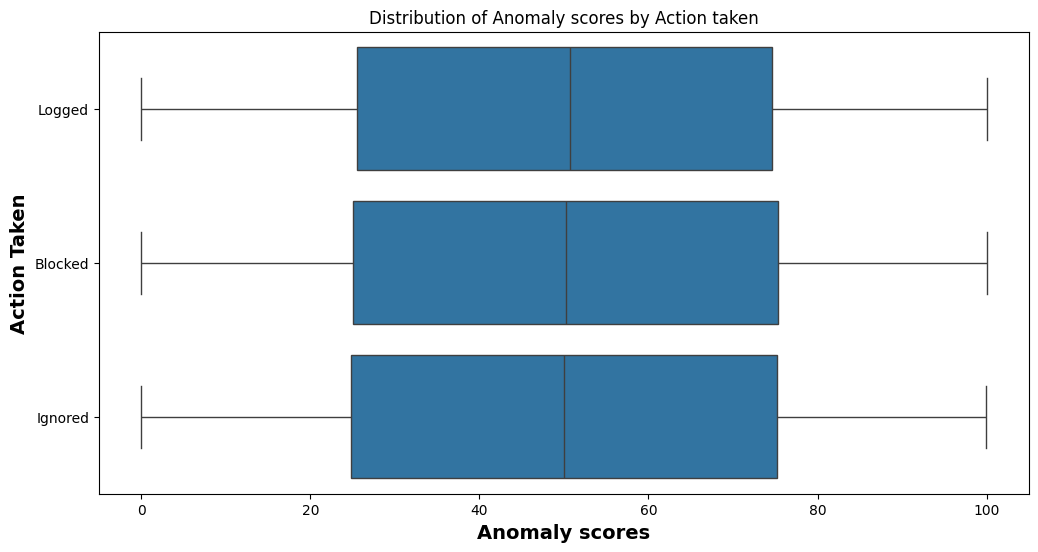

In [40]:
for col in numerical_columns:
  plt.figure(figsize=(12, 6))
  sns.boxplot(data=df,x=col, y='Action Taken', showfliers=False)  # Set showfliers=False to exclude outliers
  plt.title(f'Distribution of {col.capitalize()} by Action taken')
  plt.xlabel(col.capitalize(), fontsize=14, fontweight='bold')
  plt.ylabel('Action Taken', fontsize=14, fontweight='bold')
  plt.show()

In [41]:
#Finding the unique values in categoricalcolumns
for col in categoricalcolumns:
  print('unique value in',col,'=',df[col].unique())


unique value in Timestamp = ['2023-05-30 06:33:58' '2020-08-26 07:08:30' '2022-11-13 08:23:25' ...
 '2022-03-31 01:45:49' '2023-09-22 18:32:38' '2023-10-10 11:59:52']
unique value in Source IP Address = ['103.216.15.12' '78.199.217.198' '63.79.210.48' ... '162.35.217.57'
 '208.72.233.205' '14.102.21.108']
unique value in Destination IP Address = ['84.9.164.252' '66.191.137.154' '198.219.82.17' ... '98.107.0.15'
 '173.79.112.252' '109.198.45.7']
unique value in Protocol = ['ICMP' 'UDP' 'TCP']
unique value in Packet Type = ['Data' 'Control']
unique value in Traffic Type = ['HTTP' 'DNS' 'FTP']
unique value in Payload Data = ['Qui natus odio asperiores nam. Optio nobis iusto accusamus ad perferendis esse at. Asperiores neque at ad.\nMaiores possimus ipsum saepe vitae. Ad possimus veritatis.'
 'Aperiam quos modi officiis veritatis rem. Omnis nulla dolore perspiciatis.\nIllo animi mollitia vero voluptates error ad. Quidem maxime eaque optio a. Consectetur quasi veniam et totam culpa ullam.'


In [42]:
# #encoding the values
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for j in categoricalcolumns:

  df[j]=lab.fit_transform(df[j])


In [43]:
x=df.drop(['Action Taken'],axis=1).values
y= pd.DataFrame(df['Action Taken']).values

In [44]:
#training and testing the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [45]:
#normalisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Decision tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('confusion matrix for default decision tree classification',confusion_matrix(y_test,y_pred))
print('accuracy score for default decision tree classification',accuracy_score(y_test,y_pred))

confusion matrix for default decision tree classification [[1384 1333 1324]
 [1379 1349 1246]
 [1349 1355 1281]]
accuracy score for default decision tree classification 0.3345


In [47]:
# Grid search for Decision Tree
from sklearn.model_selection import GridSearchCV
params = {
     'criterion': ['gini', 'entropy', 'log_loss'],
     'max_depth': [None, 3, 5, 7],
     'min_samples_split': [2, 3, 4, 5]
}

grid_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [48]:
# Training Decision Tree with best parameter combination and evaluating

dt_optimised = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, min_samples_split=2)
dt_optimised.fit(x_train, y_train)
y_pred = dt_optimised.predict(x_test)
print('confusion matrix for optimised decision tree classification',confusion_matrix(y_test,y_pred))
print('accuracy score for optimised decision tree classification',accuracy_score(y_test,y_pred))

confusion matrix for optimised decision tree classification [[4040    0    1]
 [3972    1    1]
 [3981    1    3]]
accuracy score for optimised decision tree classification 0.337


**Random Forest**

In [49]:
# Training Random Forest with default parameters

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('confusion matrix for default random forest classification',confusion_matrix(y_test,y_pred))
print('accuracy score for default random forest classification',accuracy_score(y_test,y_pred))

<ipython-input-49-76357951317e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


confusion matrix for default random forest classification [[1579 1347 1115]
 [1542 1228 1204]
 [1556 1322 1107]]
accuracy score for default random forest classification 0.32616666666666666


In [ ]:
# Grid search for Random Forest

params = {
    'n_estimators': [50, 100, 150],
    'max_depth' : [3, 5, 7, None],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_cv = GridSearchCV(RandomForestClassifier(), params, verbose=1, cv=5)
grid_cv.fit(x_train, y_train)

grid_cv.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
# Training Random Forest with best parameter combination and evaluating

rf_optimised = RandomForestClassifier(n_estimators=150, max_depth=3, criterion='gini')
rf_optimised.fit(x_train, y_train)
y_pred = rf_optimised.predict(x_test)
print('confusion matrix for optimised random forest classification',confusion_matrix(y_test,y_pred))
print('accuracy score for optimised random forest classification',accuracy_score(y_test,y_pred))

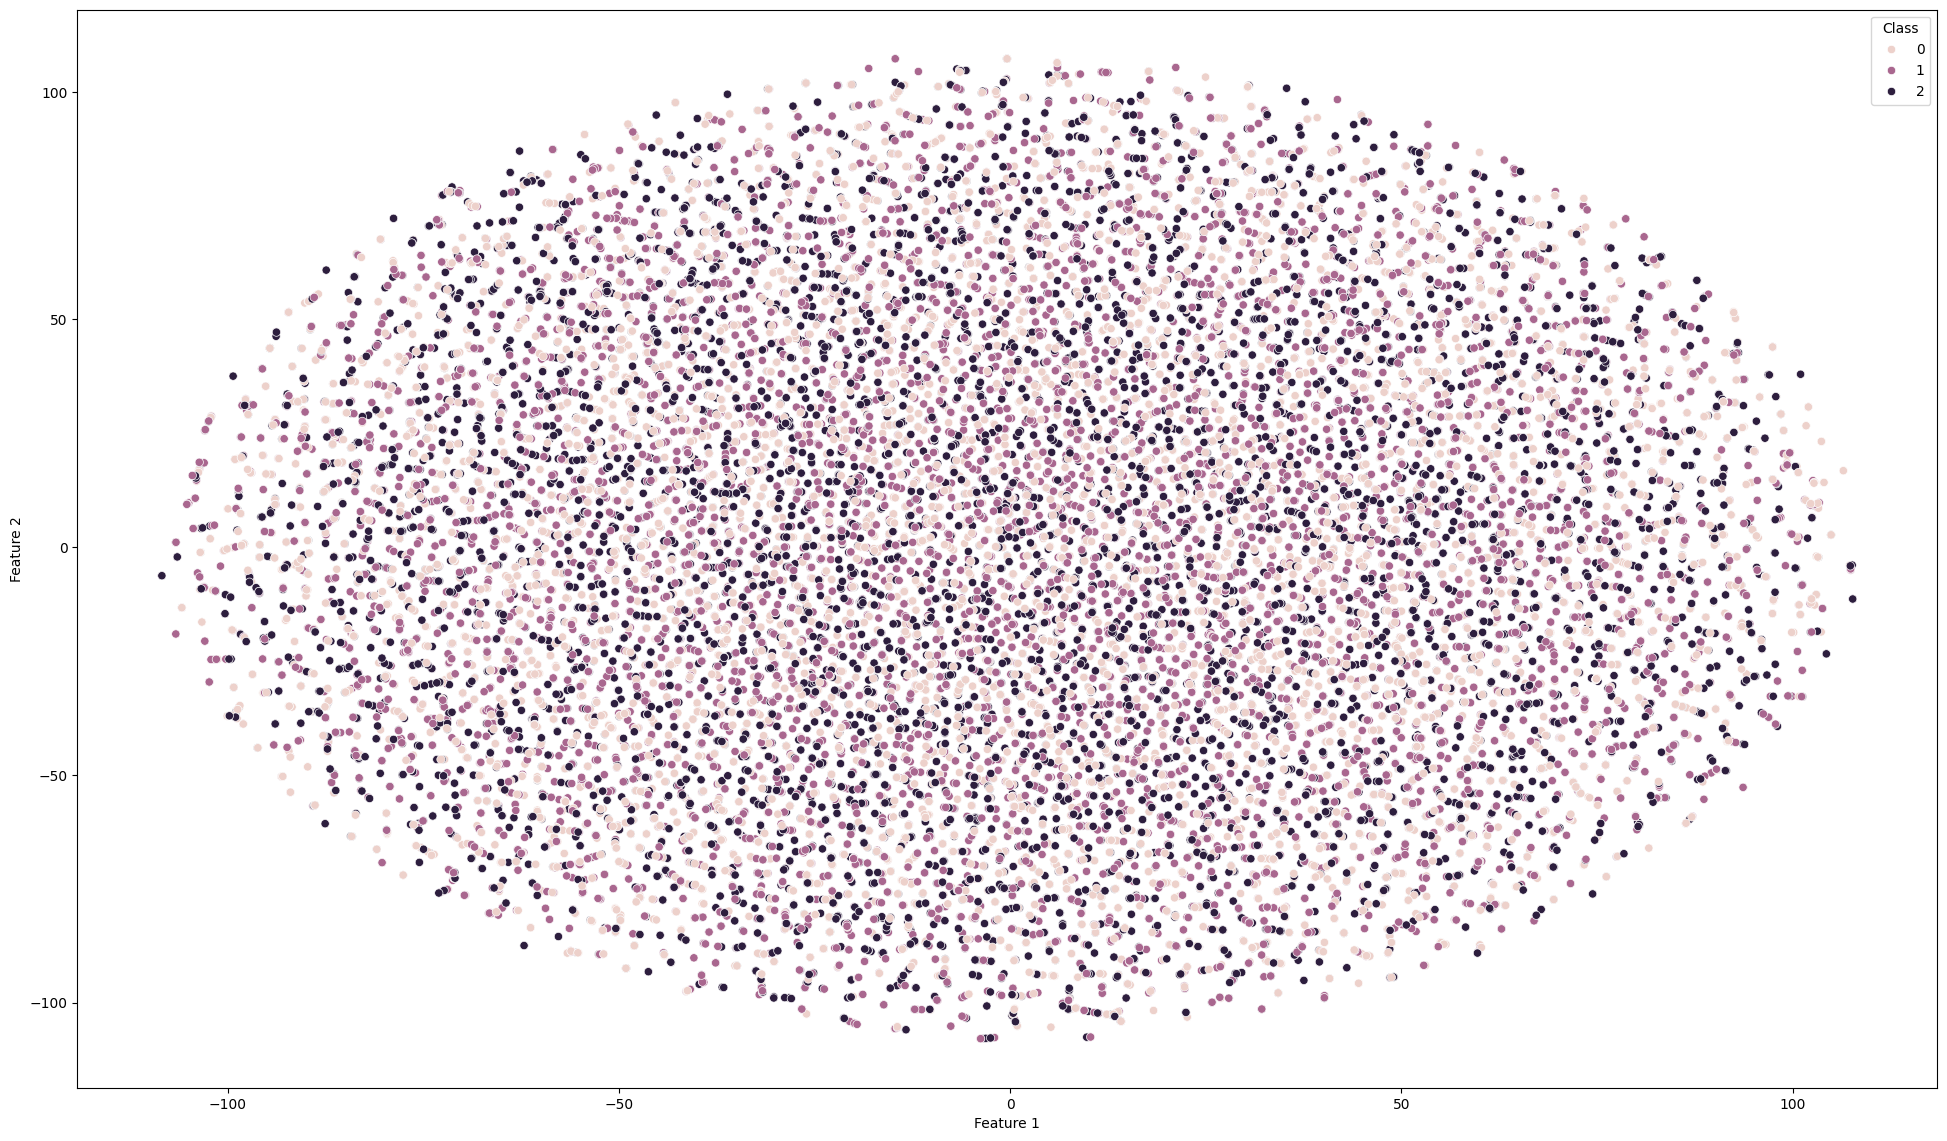

In [52]:
#T-SNE for visualization of sampled data

from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, init='random', learning_rate='auto', perplexity=3)
tsne_results = tsne.fit_transform(x_train)

tsne_df = pd.DataFrame()
tsne_df['Feature 1'] = tsne_results[:,0]
tsne_df['Feature 2'] = tsne_results[:,1]
tsne_df['Class'] = y_train

plt.figure(figsize=(24,14))
sns.scatterplot(x='Feature 1', y='Feature 2', hue='Class', data=tsne_df)
plt.show()